# CS5530 - Assignment 3

The data file `Corona_NLP_test.csv` contains tweets that have been pulled from Twitter. In this dataset
use the text data in the `OriginalTweet` column and perform the following:

1. Convert the text corpus into tokens.
2. Perform stop word removal.
3. Count Word frequencies
4. Create word clouds.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
# Load in the dataset
df = pd.read_csv("Corona_NLP_test.csv", encoding='latin1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


## a. Convert the text corpus into tokens.

In [4]:
tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in df['OriginalTweet']]
tokenized_tweets[0]

['trending',
 ':',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(',
 'pictured',
 ',',
 'wegmans',
 'in',
 'brooklyn',
 ')',
 ',',
 'sold-out',
 'online',
 'grocers',
 '(',
 'foodkick',
 ',',
 'maxdelivery',
 ')',
 'as',
 '#',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 'up',
 'https',
 ':',
 '//t.co/gr76pcrlwh',
 'https',
 ':',
 '//t.co/ivmkmsqdt1']

## b. Perform stop word removal.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/odai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stop_words = set(stopwords.words('english'))
filtered_tweets = [[word for word in tweet if not word in stop_words] for tweet in tokenized_tweets]
filtered_tweets[0]

['trending',
 ':',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(',
 'pictured',
 ',',
 'wegmans',
 'brooklyn',
 ')',
 ',',
 'sold-out',
 'online',
 'grocers',
 '(',
 'foodkick',
 ',',
 'maxdelivery',
 ')',
 '#',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 'https',
 ':',
 '//t.co/gr76pcrlwh',
 'https',
 ':',
 '//t.co/ivmkmsqdt1']

## c. Count Word frequencies

In [9]:
word_freq = {}

for tweet in filtered_tweets:
    for word in tweet:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

word_freq

{'trending': 4,
 ':': 2413,
 'new': 98,
 'yorkers': 3,
 'encounter': 3,
 'empty': 132,
 'supermarket': 515,
 'shelves': 214,
 '(': 276,
 'pictured': 1,
 ',': 3528,
 'wegmans': 7,
 'brooklyn': 6,
 ')': 340,
 'sold-out': 2,
 'online': 509,
 'grocers': 11,
 'foodkick': 1,
 'maxdelivery': 1,
 '#': 7857,
 'coronavirus-fearing': 1,
 'shoppers': 40,
 'stock': 780,
 'https': 1824,
 '//t.co/gr76pcrlwh': 1,
 '//t.co/ivmkmsqdt1': 1,
 'could': 94,
 "n't": 352,
 'find': 58,
 'hand': 139,
 'sanitizer': 84,
 'fred': 2,
 'meyer': 2,
 'turned': 4,
 'amazon': 74,
 '.': 4758,
 '$': 165,
 '114.97': 1,
 '2': 124,
 'pack': 14,
 'purell': 1,
 '?': 2597,
 '!': 932,
 'check': 55,
 'coronavirus': 1510,
 'concerns': 26,
 'driving': 9,
 'prices': 434,
 '//t.co/ygbipbflmy': 1,
 'protect': 33,
 'loved': 5,
 'ones': 21,
 'panic': 483,
 'buying': 288,
 'hits': 6,
 'newyork': 5,
 'city': 32,
 'anxious': 7,
 'food': 1331,
 '&': 578,
 'amp': 610,
 ';': 625,
 'medical': 27,
 'supplies': 163,
 'healthcare': 26,
 'worker':

## d. Create word clouds.

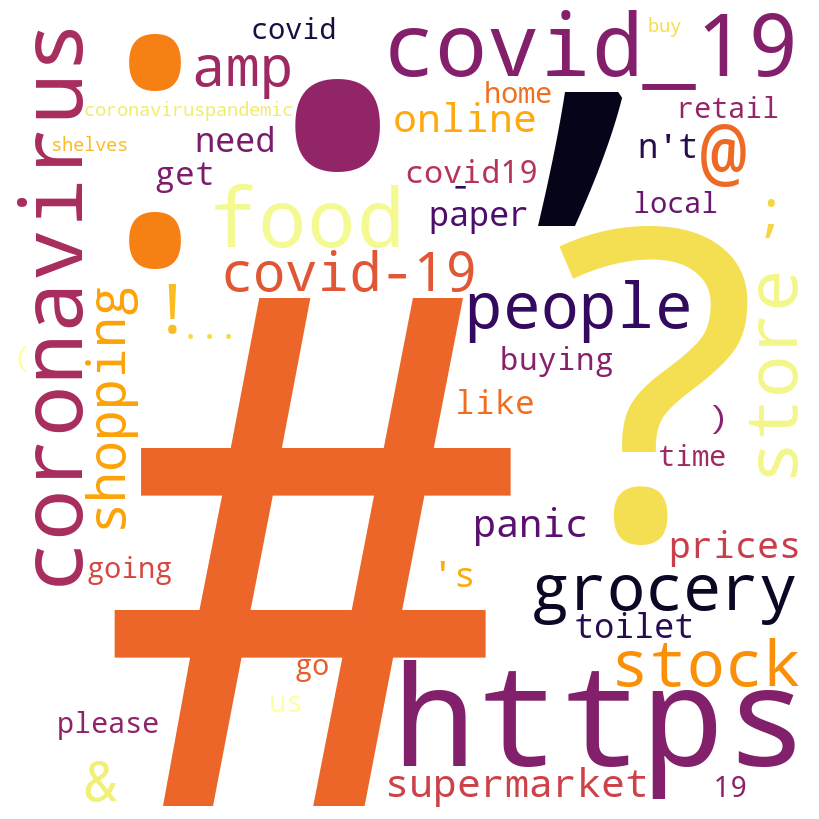

In [10]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', max_words=50).generate_from_frequencies(word_freq)

# Display word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
